In [1]:
import os
import sys

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "src")))
import logging
import pandas as pd
import scanpy as sc
import decoupler as dc
from utils import load_config

logging.basicConfig(level=logging.DEBUG)

# Load the configuration file
config = load_config("../config.yaml")


# Function to load gene expression data
def load_gene_expression_data(file_path, chunk_size=2000):
    """
    Load gene expression data in chunks to handle large file sizes.

    Args:
        file_path (str): Path to the preprocessed gene expression file.
        chunk_size (int): Size of chunks to load the data.

    Returns:
        pd.DataFrame: Combined gene expression matrix.
    """
    logging.info("Loading gene expression dataset in chunks...")
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunks.append(chunk)
    mat = pd.concat(chunks, axis=0)
    logging.info(f"Gene expression matrix loaded with shape: {mat.shape}")
    return mat


# # Load the gene expression matrix
gene_df = load_gene_expression_data(config["data_paths"]["preprocessed_best_inferred_file"])
# Add an increasing integer ID column
gene_df.insert(0, "ID", range(1, len(gene_df) + 1))

INFO:root:Loading gene expression dataset in chunks...
INFO:root:Gene expression matrix loaded with shape: (5783, 10177)


In [2]:
# Extract perturbation IDs and drop target/metadata columns
pert_ids = gene_df["ID"]
mat = gene_df.drop(columns=["ID", "viability", "cell_mfc_name", "pert_dose"])

# Create AnnData object for Decoupler
adata = sc.AnnData(
    X=mat.values, obs=pd.DataFrame(index=pert_ids), var=pd.DataFrame(index=mat.columns)
)
logging.debug(f"AnnData object created with shape: {adata.shape}")

c:\Users\20191678\AppData\Local\miniconda3\envs\5ARG45\lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
DEBUG:root:AnnData object created with shape: (5783, 10174)


In [3]:
# Load CollecTRI network
net = dc.get_collectri(organism="human", split_complexes=False)

# Verify network format
net.shape

DEBUG:root:Attempting to construct classes from the server
DEBUG:root:Initialized `<Downloader[options=Options(url='https://omnipathdb.org', fallback_urls=('http://no-tls.omnipathdb.org',), static_url='http://no-tls.static.omnipathdb.org/resources', license=None, cache=<NoopCache>, autoload=True, convert_dtypes=True, num_retries=0, timeout=3.0, chunk_size=2048)]>`
DEBUG:root:Attempting server `https://omnipathdb.org/`.
DEBUG:root:Looking up in cache: `https://omnipathdb.org/queries/enzsub?format=json` ('b6a54633e6816d5af773b5c4a03a9044').
INFO:root:Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): omnipathdb.org:443
DEBUG:urllib3.connectionpool:https://omnipathdb.org:443 "GET /queries/enzsub?format=json HTTP/11" 200 976
DEBUG:root:Caching result to `<NoopCache>['b6a54633e6816d5af773b5c4a03a9044']`
DEBUG:root:Attempting to construct classes from the server
DEBUG:root:Initialized `<Downloader[options=

(43178, 4)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\20191678\\AppData\\Local\\miniconda3\\envs\\5ARG45\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\20191678\\AppData\\Local\\miniconda3\\envs\\5ARG45\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(Fo

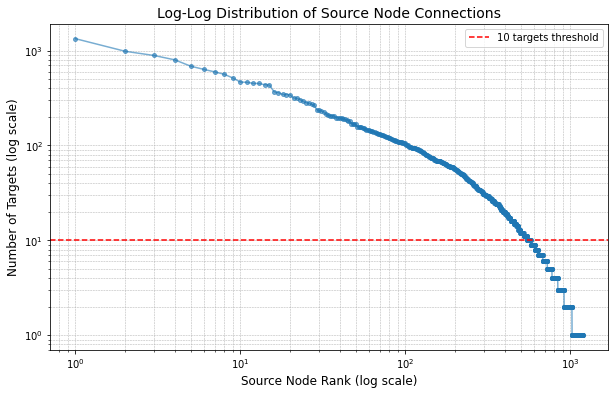

In [4]:
import matplotlib.pyplot as plt

# Count occurrences and sort by connection counts
counts = net["source"].value_counts().sort_values(ascending=False)

# Plot the source node connections
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(counts) + 1), counts.values, marker="o", alpha=0.6, markersize=4)

# Log-log scale
plt.xscale("log")
plt.yscale("log")

# Add labels and grid
plt.xlabel("Source Node Rank (log scale)", fontsize=12)
plt.ylabel("Number of Targets (log scale)", fontsize=12)
plt.title("Log-Log Distribution of Source Node Connections", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Highlight the threshold (<10 targets)
plt.axhline(10, color="red", linestyle="--", label="10 targets threshold")
plt.legend()

plt.show()

DEBUG:matplotlib.ticker:vmin 0.6437573541768947 vmax 10395.221051193066
DEBUG:matplotlib.ticker:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG:matplotlib.ticker:vmin 0.6437573541768947 vmax 10395.221051193066
DEBUG:matplotlib.ticker:ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06])
DEBUG:matplotlib.ticker:vmin 0.6437573541768947 vmax 10395.2210

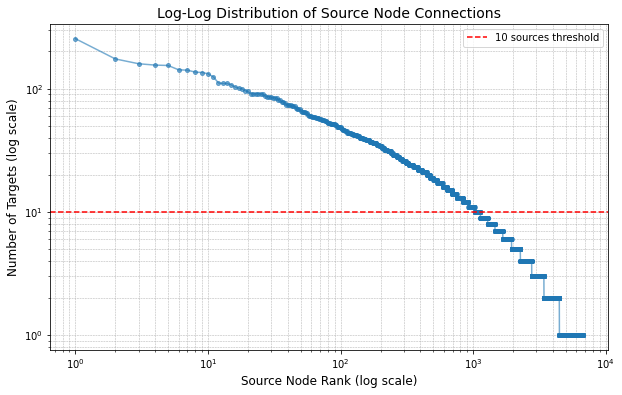

In [5]:
import matplotlib.pyplot as plt

# Count occurrences and sort by connection counts
counts = net["target"].value_counts().sort_values(ascending=False)

# Plot the source node connections
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(counts) + 1), counts.values, marker="o", alpha=0.6, markersize=4)

# Log-log scale
plt.xscale("log")
plt.yscale("log")

# Add labels and grid
plt.xlabel("Source Node Rank (log scale)", fontsize=12)
plt.ylabel("Number of Targets (log scale)", fontsize=12)
plt.title("Log-Log Distribution of Source Node Connections", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Highlight the threshold (<10 sources)
plt.axhline(10, color="red", linestyle="--", label="10 sources threshold")
plt.legend()

plt.show()

In [4]:
# Check alignment between network targets and gene expression
shared_genes = set(net["target"]).intersection(adata.var_names)
logging.debug(f"Number of shared genes: {len(shared_genes)}")
assert (
    len(shared_genes) > 0
), "No shared genes between network and gene expression matrix!"

# Filter the network for matching genes
net_filtered = net[net["target"].isin(shared_genes)]
logging.debug(f"Filtered network has {len(net_filtered)} interactions.")

DEBUG:root:Number of shared genes: 4613
DEBUG:root:Filtered network has 31662 interactions.


In [5]:
# Run TF activity inference with ULM
dc.run_ulm(
    mat=adata,
    net=net_filtered,
    source="source",
    target="target",
    weight="weight",
    verbose=False,
    min_n=1,  # Minimum targets per TF
    use_raw=False,  # Use raw gene expression data
)

# Store the results for downstream analysis
adata.obsm["ulm_estimate"].head()

ABL1     ADNP2     AEBP1     AEBP2       AHR      AHRR       AIP  \
1 -0.338719 -0.272921  1.010263  0.294417 -0.845332  1.542391 -1.381124   
2 -0.169435 -0.133108 -0.146502  0.184652 -0.570860 -2.723095  2.463488   
3 -0.092708 -0.086154 -1.613986  0.137736  1.040746  0.180649  0.267816   
4  0.999222  0.109658 -0.852483 -0.075707  2.664647 -0.047460 -1.369606   
5 -1.555471 -1.850359 -0.959568  0.064782  1.399960  0.092011  0.137947   

       AIRE      AKNA      ALX3  ...    ZNF746     ZNF76     ZNF77   ZNF804A  \
1  0.290615 -1.461944 -0.256169  ... -0.266505 -1.726446  1.029244 -0.879246   
2 -0.336024 -0.100455 -0.092928  ... -0.117718  0.090565 -0.155869  0.287527   
3  0.915917  2.833783 -0.045945  ... -0.070752  0.090630 -0.108933  0.240684   
4  0.232237  0.131164  0.136129  ...  0.119798  1.438413  0.094664 -0.007946   
5  1.385958  1.819797 -0.006541  ... -0.022282  0.057504 -0.046507  0.130102   

      ZNF91   ZSCAN18   ZSCAN26    ZSCAN9      ZXDA      ZXDC  
1 -2.719356 -0.222434 -0.912316 -0.222434 -1.230471 -1.743906  
2 -1.340977 -0.012059  2.990717 -0.012059 -2.213703 -1.620217  
3 -1.177678  0.034981  0.092768  0.034981 -0.078808 -0.063744  
4 -0.627094  2.149328 -0.105304  2.149329  1.569247  0.333512  
5  0.688645  0.044805 -1.772867  0.044805 -0.018023  0.004787  

[5 rows x 1003 columns]

In [6]:
adata.obsm["ulm_estimate"]

ABL1     ADNP2     AEBP1     AEBP2       AHR      AHRR       AIP  \
1    -0.338719 -0.272921  1.010263  0.294417 -0.845332  1.542391 -1.381124   
2    -0.169435 -0.133108 -0.146502  0.184652 -0.570860 -2.723095  2.463488   
3    -0.092708 -0.086154 -1.613986  0.137736  1.040746  0.180649  0.267816   
4     0.999222  0.109658 -0.852483 -0.075707  2.664647 -0.047460 -1.369606   
5    -1.555471 -1.850359 -0.959568  0.064782  1.399960  0.092011  0.137947   
...        ...       ...       ...       ...       ...       ...       ...   
5779  0.369322 -0.197916 -0.963407 -1.292874 -2.547689  1.761594 -0.735175   
5780 -0.813768 -0.018434 -0.027770  0.054357  0.805102  0.084243  0.127722   
5781  0.321256 -0.329192 -0.337544  0.361336 -0.994265 -1.451101  0.556585   
5782  2.040360 -0.305372  0.420046  1.798146  0.756789 -1.112157  0.441450   
5783 -0.049718 -0.054102 -0.064892  0.095624  0.650851 -2.246267  0.194016   

          AIRE      AKNA      ALX3  ...    ZNF746     ZNF76     ZNF77  \
1     0.290615 -1.461944 -0.256169  ... -0.266505 -1.726446  1.029244   
2    -0.336024 -0.100455 -0.092928  ... -0.117718  0.090565 -0.155869   
3     0.915917  2.833783 -0.045945  ... -0.070752  0.090630 -0.108933   
4     0.232237  0.131164  0.136129  ...  0.119798  1.438413  0.094664   
5     1.385958  1.819797 -0.006541  ... -0.022282  0.057504 -0.046507   
...        ...       ...       ...  ...       ...       ...       ...   
5779 -1.112549 -1.662489 -0.177280  ... -0.190012 -1.100291 -0.209606   
5780  0.725345  2.014345  0.009570  ... -0.007707  1.552278 -0.034298   
5781 -0.090283 -2.107647 -0.304140  ... -2.158838 -1.248848 -2.183036   
5782 -0.780781 -0.289154 -1.735139  ... -0.297732 -2.126791 -0.316673   
5783 -0.179236 -2.351480 -0.021733  ... -2.417617  0.072956 -0.072438   

       ZNF804A     ZNF91   ZSCAN18   ZSCAN26    ZSCAN9      ZXDA      ZXDC  
1    -0.879246 -2.719356 -0.222434 -0.912316 -0.222434 -1.230471 -1.743906  
2     0.287527 -1.340977 -0.012059  2.990717 -0.012059 -2.213703 -1.620217  
3     0.240684 -1.177678  0.034981  0.092768  0.034981 -0.078808 -0.063744  
4    -0.007946 -0.627094  2.149328 -0.105304  2.149329  1.569247  0.333512  
5     0.130102  0.688645  0.044805 -1.772867  0.044805 -0.018023  0.004787  
...        ...       ...       ...       ...       ...       ...       ...  
5779 -1.221279 -0.228139 -0.135734  1.664896 -0.135734 -0.257840 -0.360705  
5780  0.126053  0.367010  2.139640 -1.962823  2.139640  1.470119  1.075560  
5781 -1.393855 -1.068088 -0.253698  0.333313 -0.253698 -0.438794  0.296398  
5782 -1.356413  0.435361 -0.245256  0.308654 -0.245256  0.684566 -0.508935  
5783  0.178496  0.246434  0.043410  0.059426  0.043410 -0.041867 -0.020802  

[5783 rows x 1003 columns]

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\20191678\\AppData\\Local\\miniconda3\\envs\\5ARG45\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\20191678\\AppData\\Local\\miniconda3\\envs\\5ARG45\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(Fo

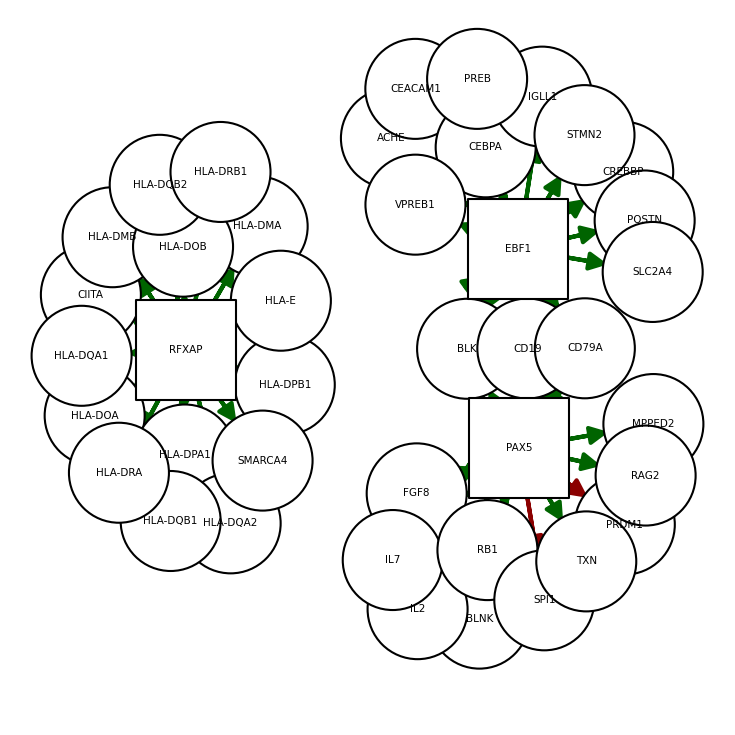

In [7]:
dc.plot_network(
    net=net,
    n_sources=["PAX5", "EBF1", "RFXAP"],
    n_targets=15,
    node_size=100,
    s_cmap="white",
    t_cmap="white",
    c_pos_w="darkgreen",
    c_neg_w="darkred",
    figsize=(5, 5),
)